<a href="https://colab.research.google.com/github/bitdough/learning/blob/master/related_hashtags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Related Hashtags Detector

This notebook finds other hashtags that are most commonly found with a given hashtag and creates a bar graph of them. This can be used to track how disinformation campaigns or stories are happening.

##Instructions to run

Be patient. It will take a little bit to run, especially if you made the limit higher. 

1.   Click Open in playground mode in top-left corner
2.   Write your seed hashtag (including the #) between the quotes below.
3.   Change any other variables you want to.
4.   Click Runtime in menu at top, click run all.
5.   Visualization should be at the bottom

In [0]:
seed_hashtag = "#qanon"   #change this to whatever seed hashtag you want. Qanon is fake. 
limit = 500   #This changes the number of tweets to pull

In [0]:
%%capture
!pip install twint

import twint
import heapq
import matplotlib.pyplot as plt

In [0]:
%%capture
c = twint.Config()
c.Hide_output = True #makes the command line less noisy
c.Limit = limit #maximum number of tweets to pull per account
c.Store_object = True
c.Search = seed_hashtag
twint.run.Search(c)
tweets = twint.output.tweets_list

#counts occurrence of hashtags
hashtags_dict = {}
for tweet in tweets:
  for hashtag in tweet.hashtags:
    if hashtag in hashtags_dict:
      hashtags_dict[hashtag] += 1
    else:
      hashtags_dict[hashtag] = 1

del hashtags_dict[seed_hashtag] #gets rid of seed hashtag
top_hashtags = heapq.nlargest(10, hashtags_dict, key=hashtags_dict.get) #gets highest hashtags

#makes dictionary of just highest ones
hashtags_ranked = {}
for hashtag in top_hashtags:
  hashtags_ranked[hashtag] = hashtags_dict[hashtag]

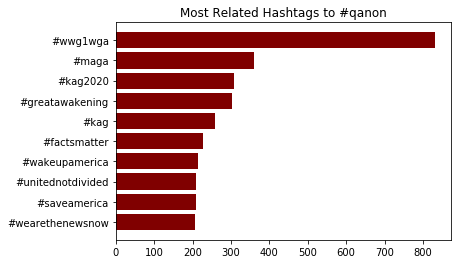

In [0]:
plt.barh(range(len(hashtags_ranked)), list(hashtags_ranked.values()), align='center', color = 'maroon')
plt.yticks(range(len(hashtags_ranked)), list(hashtags_ranked.keys()))
plt.gca().invert_yaxis() #just to have the highest bar at the top
plt.title("Most Related Hashtags to " + seed_hashtag)
plt.show()

In [0]:
print("List of most related hashtags:")
print(top_hashtags)

List of most related hashtags:
['#wwg1wga', '#maga', '#kag2020', '#greatawakening', '#kag', '#factsmatter', '#wakeupamerica', '#unitednotdivided', '#saveamerica', '#wearethenewsnow']
